#                 Data Analysis of Netflix Contents

####  In this notebook I am going to try explore the data I have and going to answer questions like:

 - What are the percentage of different content types on Netflix
 - What is the number of contents added over the years on Netflix
 - What are the user ratings on Netflix contents
 - Which country released highest number of contents.
 - What is the average length of movies
 - What combination of countries  and content types are most common?
 - What are the oldest TV Shows  and Movies on Netflix.
 - Which director made how many movies in each release_year


### Importing the required libraries

In [94]:
import pandas as pd 
import numpy as np 
pd.plotting.register_matplotlib_converters()
#%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Loading dataset 

In [95]:
netflix_data=pd.read_csv('netflix_titles.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [96]:
# List of columns in dataset

netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [97]:
# Number of columns and rows in the dataset

netflix_data.shape

(6234, 12)

In [98]:
#summary statistics

netflix_data.describe() 

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


### Null values

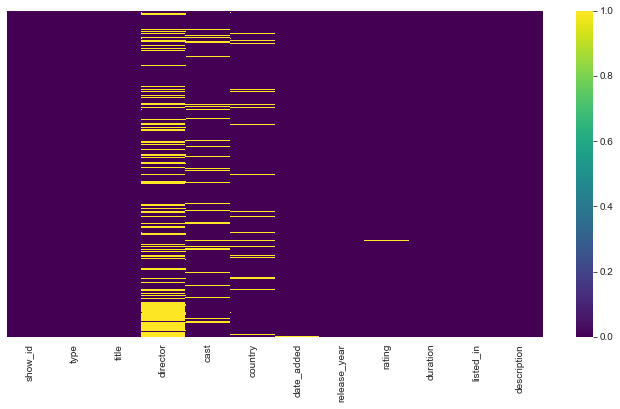

In [99]:
plt.figure(figsize=(12,6))
sns.heatmap(netflix_data.isnull(),yticklabels=False,cmap="viridis")

Roughly 5% of cast and country data are missing. The proportion of missed data are likely small enough for resonable replacement with some form of imputation. On the otherhand, we are missing around 33% of data from director column. 

In [100]:
# Count the number of missing value in each column

netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

###  Data Cleaning

In [101]:
# parsing the date_added column 
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'])
netflix_data['year_added'] = netflix_data['date_added'].dt.year
netflix_data['month_added'] = netflix_data['date_added'].dt.month


In [102]:
# Splitting the duration column into season_count and duration_2 columns

netflix_data['duration_2'] =     netflix_data.apply(lambda x : float(x['duration'].split(" ")[0]) if "Season" not in x['duration'] else "", axis = 1)
netflix_data['season_count'] = netflix_data.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)


### Data Visualization

<Figure size 864x432 with 0 Axes>

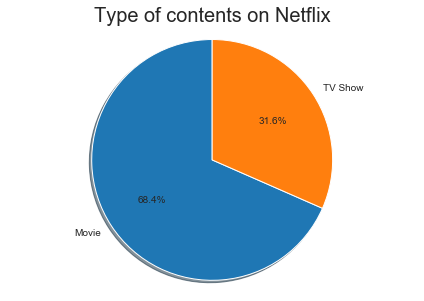

<Figure size 432x288 with 0 Axes>

In [119]:
col = "type"
grouped = netflix_data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

plt.figure(figsize=(12,6))
fig1, ax1 = plt.subplots()
ax1.pie(grouped['count'], labels=grouped[col], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Type of contents on Netflix",fontsize=20)
plt.show()
plt.savefig("piechart")

 $68.4$% of the netflix content is movies and remaining $31.6$% of them are TV Shows. Netflix contain a wide variety of award-winning TV shows and movies.

Text(0, 0.5, 'Count')

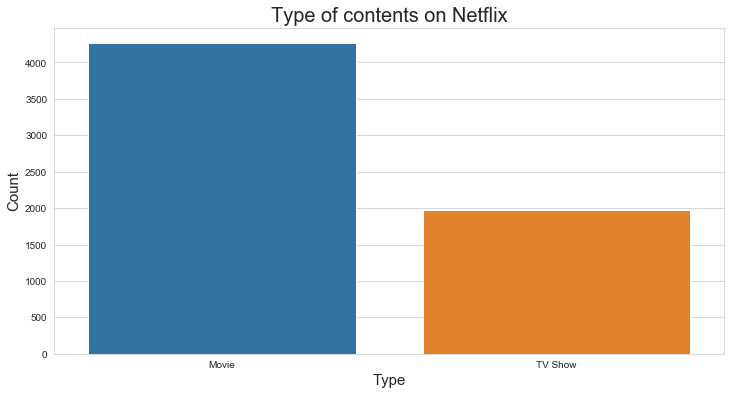

In [104]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.countplot("type",data=netflix_data)
plt.title("Type of contents on Netflix",fontsize=20)
plt.xlabel("Type",fontsize=15)
plt.ylabel("Count",fontsize=15)


### Netflix ratings

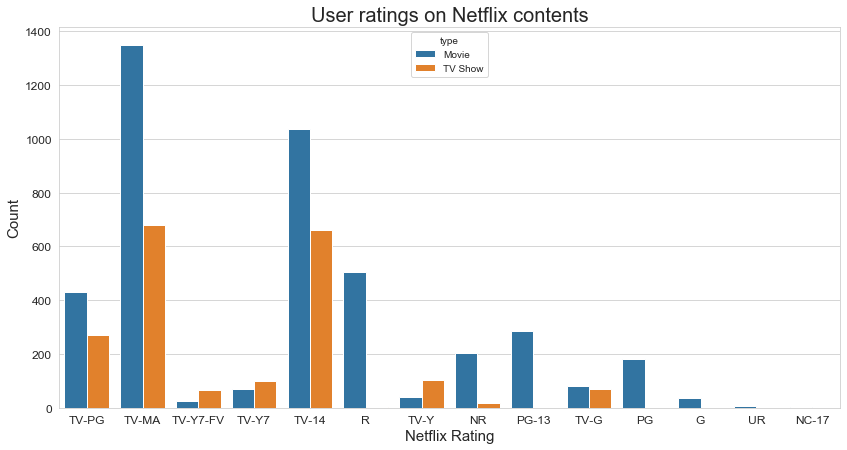

In [128]:
plt.figure(figsize=(14,7))
plt.title("User ratings on Netflix contents",fontsize=20)
sns.countplot("rating",hue="type",data=netflix_data)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Netflix Rating",fontsize=15)
plt.savefig("rating")

The largest number of netflix contents are made with the 'TV-MA' rating. "TV-MA",R, NC-17 are the ratings assigned by the TV Parental Guidelines to television programs that were designed for adult audiences only.The films that fallen under those category may contain materials which are inappropiate for children under the age of 17.

The second largest content category in netflix are made with the 'TV-14' rating. The netflix contents comes with PG-13, TV-14 rating are fallen under Teen category.


Third largest is the very popular 'R' rating. The Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian". Movies/TV shows comes with TV-Y, TV-Y7, G, TV-G, PG, TV-PG ratings are fallen under kids category. 

### Which country released highest number of contents.

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 <a list of 10 Text xticklabel objects>)

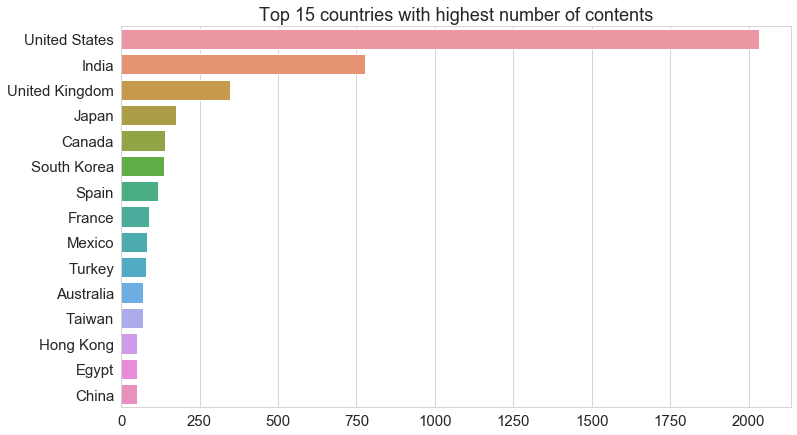

In [106]:
plt.figure(figsize=(12,7))
plt.title("Top 15 countries with highest number of contents",fontsize=18)
top_countries=netflix_data.country.value_counts()
top_countries=top_countries[:15]
sns.barplot(x=top_countries.values,y=top_countries[:15].index)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

United States has highest number of contents on Netflix. Around 2000 contents are streaming on Netflix which are made by USA. Second-most number of contents are from India. Number of Indian movies/TV Shows are approximately one-third of USA. On the otherside China, Egypt and Hong kong has fewest number of contents.

### What combination of countries  and content types are most common?

In [107]:
country_type_counts=netflix_data.groupby(["country","type"]).type.count().sort_values(ascending=False)
country_type_counts

country                                 type   
United States                           Movie      1482
India                                   Movie       724
United States                           TV Show     550
United Kingdom                          TV Show     178
                                        Movie       170
                                                   ... 
Netherlands, Germany, Italy, Canada     TV Show       1
Netherlands, United States              Movie         1
New Zealand, United Kingdom             Movie         1
New Zealand, United Kingdom, Australia  Movie         1
West Germany                            Movie         1
Name: type, Length: 636, dtype: int64

### Number of contents added in last 20 years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

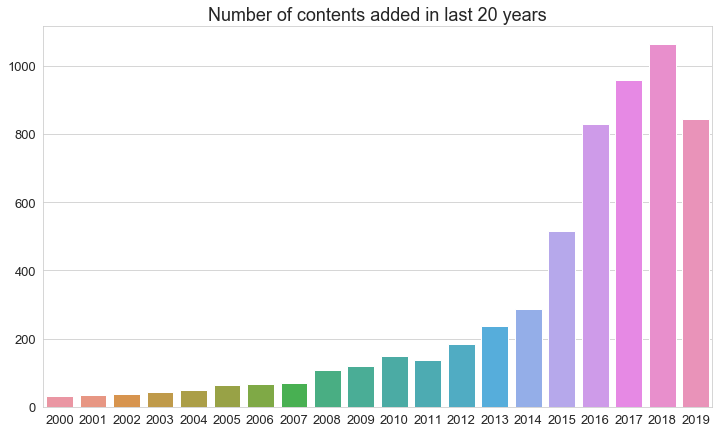

In [108]:
plt.figure(figsize=(12,7))
plt.title("Number of contents added in last 20 years",fontsize=18)

top_countries=netflix_data.release_year.value_counts()
top_countries=top_countries[:20]
sns.barplot(y=top_countries.values,x=top_countries.index)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

Number of content on Netflix has increased significantly in last 5 years.Its a sign that netflix popularity is increasing day by day. There's always new TV shows and movies are being added every month. From the it can be seen that in 2014 the number of contents was around 500. From 2015 to 2018 the number doubled.

Text(0.5, 0, 'Type')

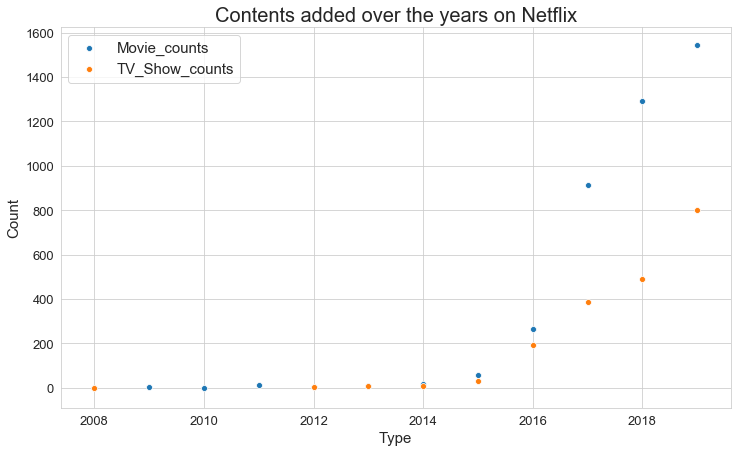

In [109]:
col = "year_added"

#TV_Show_counts = netflix_data[netflix_data["type"] == "TV Show"].year_added.value_counts().reset_index()
TV_Show_counts = netflix_data[netflix_data["type"] == "TV Show"][col].value_counts().reset_index()
TV_Show_counts= TV_Show_counts.rename(columns = {col : "count", "index" : col})
TV_Show_counts = TV_Show_counts.sort_values(col)

Movie_counts = netflix_data[netflix_data["type"] == "Movie"][col].value_counts().reset_index()
Movie_counts = Movie_counts.rename(columns = {col : "count", "index" : col})
Movie_counts = Movie_counts.sort_values(col)

plt.figure(figsize=(12,7))
plt.title("Contents added over the years on Netflix",fontsize=20)
sns.scatterplot(x=Movie_counts[col][:-1], y=Movie_counts["count"])
sns.scatterplot(x=TV_Show_counts[col][:-1], y=TV_Show_counts["count"])
plt.legend(labels=['Movie_counts', 'TV_Show_counts'],fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Type",fontsize=15)

It clear from the graph that between 2008 and 2015 the number of movies and tv shows on netflix were almost same. In 2015 it was about 100. From 2016 there was a sharp increase in available number of movies on netflix. In 2018 the number doubled. The number of TV shows also increases over the years.

### Distribution plot of movie duration

Text(0.5, 0, 'Movie duration in minutes')

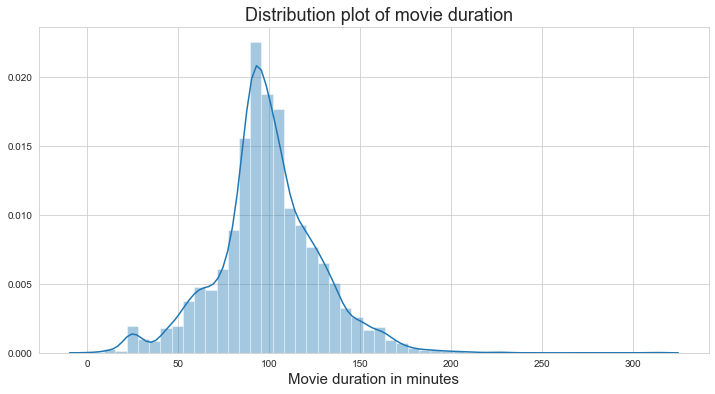

In [110]:
# Normal distribution of movie duration
Movie_duration =  netflix_data[netflix_data["type"] == "Movie"]['duration_2'].fillna(0.0)
plt.figure(figsize=(12,6))
plt.title('  Distribution plot of movie duration',fontsize=18)

sns.distplot(Movie_duration)
plt.xlabel("Movie duration in minutes",fontsize=15)

The distribution of the duration of movies available on Netflix are appximately symmetric. The avarage movie duration is about 90 minutes.

### Oldest TV Shows  on Netflix

In [111]:
old_TV_show=netflix_data.loc[(netflix_data.listed_in=="TV Shows") &  (netflix_data.release_year<2000)].sort_values(by="release_year")[['title', 'release_year', 'listed_in']]
old_TV_show

,title,release_year,listed_in
4292,Pioneers: First Women Filmmakers*,1925,TV Shows
4079,Pioneers of African-American Cinema,1946,TV Shows
2761,Bob Ross: Beauty Is Everywhere,1991,TV Shows
4705,Chill with Bob Ross,1994,TV Shows


### Oldest  Movies on Netflix

In [112]:
old_movie=netflix_data.loc[(netflix_data.type=="Movie") &  (netflix_data.release_year<2000)].sort_values(by="release_year")

old_movie[['title', 'release_year', 'listed_in']]

,title,release_year,listed_in
2011,Prelude to War,1942,"Classic Movies, Documentaries"
2013,The Battle of Midway,1942,"Classic Movies, Documentaries"
2026,WWII: Report from the Aleutians,1943,Documentaries
2023,Why We Fight: The Battle of Russia,1943,Documentaries
2022,Undercover: How to Operate Behind Enemy Lines,1943,"Classic Movies, Documentaries"
...,...,...,...
3538,Magnolia,1999,"Dramas, Independent Movies"
3540,Mansfield Park,1999,"Comedies, Dramas, International Movies"
3564,Stuart Little,1999,"Children & Family Movies, Comedies"
3483,American Beauty,1999,Dramas


### Which director made how many movies in each release_year

In [113]:
dirct_year_counts=netflix_data.groupby(["director","release_year"]).size().sort_values(ascending=False)
dirct_year_counts

director                release_year
Raúl Campos, Jan Suter  2018            12
Marcus Raboy            2017             6
Fernando Ayllón         2019             4
S.S. Rajamouli          2015             4
Matt Askem              2018             4
                                        ..
Nitesh Tiwari           2016             1
Nishil Sheth            2017             1
Nishikant Kamat         2015             1
                        2008             1
A. L. Vijay             2016             1
Length: 4106, dtype: int64

### Available Stand up Comedies on Netflix

In [114]:
comedy_content=netflix_data.loc[(netflix_data.listed_in=="Stand-Up Comedy")  ].sort_values(by="release_year")
comedy_content[['title', 'release_year', 'listed_in','cast']]

,title,release_year,listed_in,cast
4714,Richard Pryor: Live in Concert,1979,Stand-Up Comedy,Richard Pryor
5411,Eddie Murphy: Delirious,1983,Stand-Up Comedy,Eddie Murphy
4254,Sam Kinison: Breaking the Rules,1987,Stand-Up Comedy,Sam Kinison
4247,Bill Hicks: Sane Man,1989,Stand-Up Comedy,Bill Hicks
4263,Tim Allen: Men Are Pigs,1990,Stand-Up Comedy,Tim Allen
...,...,...,...,...
4297,Tiffany Haddish: Black Mitzvah,2019,Stand-Up Comedy,Tiffany Haddish
492,Arsenio Hall: Smart & Classy,2019,Stand-Up Comedy,Arsenio Hall
4608,Michelle Wolf: Joke Show,2019,Stand-Up Comedy,Michelle Wolf
2811,Whitney Cummings: Can I Touch It?,2019,Stand-Up Comedy,Whitney Cummings


### Stand-Up Comedy directed by famous director Jay karas 

In [115]:

tag = "jay karas"
netflix_data["relevant"] =netflix_data['director'].fillna("").apply(lambda x : 1 if tag in x.lower() else 0)
small = netflix_data[netflix_data["relevant"] == 1]
small[['title', 'release_year', 'listed_in']].sort_values(by="release_year",ascending=False)

,title,release_year,listed_in
2613,Adam Devine: Best Time of Our Lives,2019,Stand-Up Comedy
1781,Ali Wong: Hard Knock Wife,2018,Stand-Up Comedy
2892,Demetri Martin: The Overthinker,2018,Stand-Up Comedy
3453,Tom Segura: Disgraceful,2018,Stand-Up Comedy
773,Christina P: Mother Inferior,2017,Stand-Up Comedy
3237,Bill Burr: Walk Your Way Out,2017,Stand-Up Comedy
1580,Ali Wong: Baby Cobra,2016,Stand-Up Comedy
3193,Tom Segura: Mostly Stories,2016,Stand-Up Comedy
4839,Jeff Foxworthy and Larry the Cable Guy: We’ve ...,2016,Stand-Up Comedy
620,Anjelah Johnson: Not Fancy,2015,Stand-Up Comedy


 ### Indian TV Shows has added in last 10 years 

In [116]:
indian_show=netflix_data.loc[(netflix_data.type=="TV Show") &  (netflix_data.country=="India")].sort_values(by="release_year")
indian_show[['country','title', 'release_year', 'type']]


,country,title,release_year,type
2738,India,Jhansi Ki Rani,2009,TV Show
3964,India,Powder,2010,TV Show
2359,India,Mahi Way,2010,TV Show
2210,India,Rishta.com,2010,TV Show
2200,India,Khotey Sikkey,2011,TV Show
5538,India,Ramayan,2012,TV Show
1762,India,Classic Legends,2012,TV Show
5511,India,Bh Se Bhade,2013,TV Show
5547,India,Badalte Rishton Ki Dastaan,2013,TV Show
5561,India,Khelti Hai Zindagi Aankh Micholi,2013,TV Show


### Available Indain movies on Netflix

In [117]:
Indian_movie=netflix_data.loc[(netflix_data.type=="Movie") &  (netflix_data.country=="India")].sort_values(by="release_year")
Indian_movie[['title', 'release_year', 'listed_in','country','director']]


,title,release_year,listed_in,country,director
713,Ujala,1959,"Dramas, International Movies",India,Naresh Saigal
3153,Professor,1962,"Comedies, Dramas, International Movies",India,Lekh Tandon
4227,Sangam,1964,"Classic Movies, Dramas, International Movies",India,Raj Kapoor
3138,Amrapali,1966,"Dramas, International Movies, Music & Musicals",India,Lekh Tandon
2749,Prince,1969,"Dramas, International Movies, Romantic Movies",India,Lekh Tandon
...,...,...,...,...,...
1268,House Arrest,2019,"Comedies, Independent Movies, International Mo...",India,"Shashanka Ghosh, Samit Basu"
1267,Guna 369,2019,"Action & Adventure, Dramas, International Movies",India,Arjun Jandyala
2484,Romeo Akbar Walter,2019,"Dramas, International Movies, Thrillers",India,Robbie Grewal
35,Article 15,2019,"Dramas, International Movies, Thrillers",India,Anubhav Sinha
